# Clustering Algorithms - K-Means Demo and Exercise

Now that you have been introduced to clustering algorithms, we will demonstrate how it is done in Python and provide a few practice exercises.

## Introduction
The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:
- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the k-means model. 

We will soon dive into exactly how the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the k-means result.

### Generate the dataset and plot for visual inspection
We can probably pick out the clusters visually if we plot them in the feature space. In this example, we will generate a dataset with two features and 300 samples. Once it's generated, we will plot the dataset to visually inspect the clusters.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # for plot styling
import numpy as np

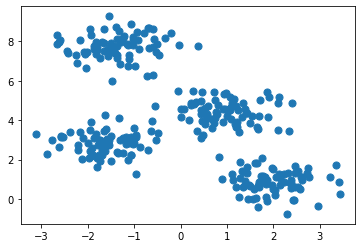

In [2]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50);

### Cluster with k-means and plot again for validation
Based on visual inspection, the appropriate number of clusters appears to be 4. We will fit the `KMeans` model from `sklearn.cluster` to our feature data and then plot the predicted clusters and their centroids.

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

NameError: name 'X' is not defined

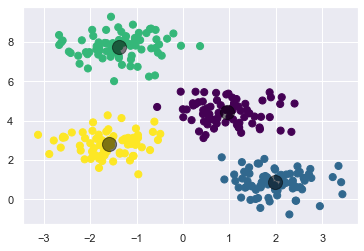

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Evaluation and Tuning
In order to determine the optimal number of clusters, we can try different values and measure the quality of our clusters with each iteration and select the model with the highest quality.

#### Evaluation Metrics
We discussed a few measures of cluster quality we can use to assess our clusters in a more objective way, including:

- Within clusters:
    - __Inertia__: Measures how close objects are to their cluster centroid
    - __Cohesion__: Measures how close objects are to other members in their cluster

- Between clusters
    - __Separation__: Measures how distinct clusters are from one another

- A combination of measurements:
    - __Silhouette__: Based on a combination of Cohesion and Separation
    
We will access some metrics from the model directly, and for others we will use `sklearn.metrics`.

In [5]:
print("Inertia: " + str(kmeans.inertia_))

Inertia: 212.00599621083472


What you want is a model with a low intertia AND low number of clusters, but that is a tradeoff.

In [6]:
from sklearn.metrics import silhouette_score

s_score = silhouette_score(X, y_kmeans)
print("Silhouette: " + str(s_score))

Silhouette: 0.6819938690643478


For silhoutte score, we want a value that's closer to one than negative one.

#### Tuning
We can try different values for the `n_clusters` parameter and measure the quality with each iteration to determine the optimal value and confirm our visual assessment.

It's helpful to plot the results of each iteration to see the impact on each metric.

In [7]:
inertia = []
sil = []

# changing the number of clusters 
for k in range(2,11):
    
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    y_pred = km.predict(X)
    
    inertia.append((k, km.inertia_))
    sil.append((k, silhouette_score(X, y_pred)))

Text(0.5, 1.0, 'Silhouetter Score Curve')

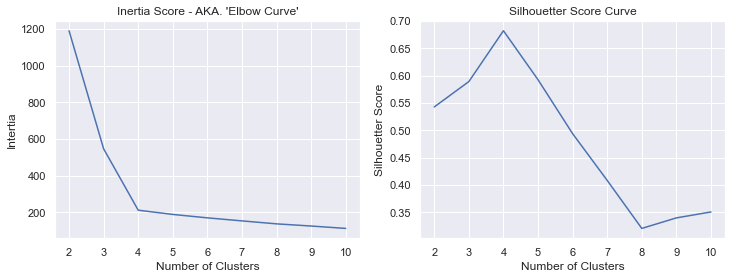

In [8]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title("Inertia Score - AKA. 'Elbow Curve'")

# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

#### Final assessment
The silouette score confirms our visual evaluation that the optimal number of clusters for this particular dataset appears to be 4, which makes sense since it was generated as such at the start of the demonstration.

It's important to understand that the intertia score will continue to improve as we break the data down into smaller and smaller clusters. However, there is an obvious point at Number of Clusters equal to 4 where the improvement in the intertia metric starts to level off. This is known as the _elbow_ and is the optimal point from the intertia perspective.

Finally, we can take a look at each prediction for each observation.

In [9]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_pred = kmeans.predict(X)
y_pred

array([0, 2, 3, 2, 0, 0, 1, 3, 2, 2, 1, 2, 3, 2, 0, 3, 3, 0, 1, 1, 0, 0,
       3, 1, 1, 3, 0, 3, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 0, 3, 1, 3, 3,
       1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 2, 3, 2, 1, 1, 1,
       2, 0, 2, 1, 3, 1, 2, 1, 1, 2, 1, 3, 0, 2, 0, 3, 0, 0, 2, 3, 0, 3,
       2, 2, 3, 0, 2, 1, 1, 3, 0, 0, 3, 1, 2, 0, 2, 0, 3, 0, 0, 3, 2, 3,
       1, 1, 0, 2, 0, 3, 2, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       1, 0, 2, 1, 1, 2, 3, 2, 2, 1, 3, 1, 3, 1, 2, 3, 2, 2, 2, 3, 2, 3,
       0, 1, 2, 1, 0, 3, 2, 3, 3, 0, 3, 1, 1, 3, 0, 3, 3, 2, 0, 3, 1, 2,
       0, 0, 3, 1, 0, 3, 1, 1, 3, 3, 3, 3, 0, 2, 3, 1, 3, 3, 1, 1, 1, 3,
       1, 2, 3, 1, 0, 1, 3, 2, 1, 2, 3, 2, 3, 1, 3, 3, 2, 1, 1, 0, 0, 3,
       2, 0, 0, 1, 0, 1, 3, 2, 2, 3, 3, 2, 3, 0, 1, 3, 0, 1, 2, 1, 0, 3,
       0, 2, 2, 2, 2, 1, 1, 2, 3, 1, 0, 3, 1, 1, 1, 0, 0, 2, 3, 3, 1, 0,
       2, 1, 3, 2, 3, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 2, 0, 0, 3, 0, 0, 0,
       2, 1, 2, 3, 0, 0, 2, 2, 2, 0, 0, 3, 2, 1])

### Limitations
The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries. Consider the following data, along with the cluster labels found by the typical k-means approach:

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

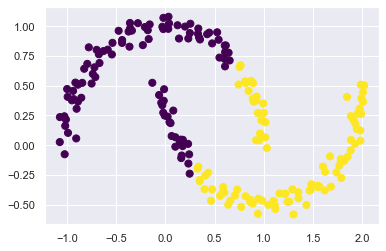

In [11]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Popular Use Case: Image Compression

One interesting application of clustering is in color compression within images. For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.

#### Context
Images contain many different colours in each pixel, which can be stored as different combinations of the colours red, green and blue (AKA. RGB values). RGB values are measured as integers between 0 and 255, which means there are a total of `255 * 255 * 255` or 16 million possible colours. Ultimately, the size of the image will depend in part on the number of different colours present in the image. 

#### The goal
If we reduce the number of colours in the image, less information will be stored and thus the image will be smaller. We may lose some information in the image, but as long as we can still tell what the image is, that's okay.

#### The solution
We can use KMeans clustering to group similar colours, and then replace all the colours with the colour at their cluster's centre, thus compressing the image while also preserving it.

#### The process

__Step 1__: Import and plot the original image
- We will use a sample image from `sklearn.datasets` to demonstrate.
- We will plot the image and then vectorize it into a matrix of pixels and RGB (Red, Green, Blue) values for each pixel.

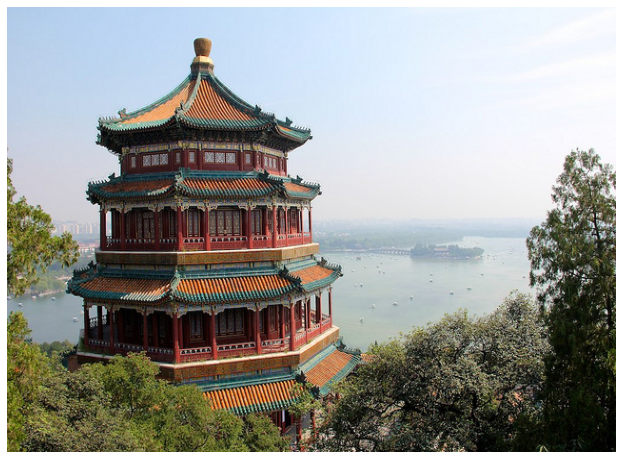

In [12]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
fig = plt.figure(figsize=(24,18))
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(china, aspect='auto');

__Step 2:__ Inspect matrix of pixels (observations) and their Red, Green, and Blue values (features).

We will show the first few pixels to get an idea of what the matrix looks like.
- It has 427 rows, 640 columns, and three values for each pixel

In [13]:
china.shape

(427, 640, 3)

In [14]:
china[10]

array([[176, 201, 231],
       [176, 201, 231],
       [177, 202, 232],
       ...,
       [250, 251, 255],
       [250, 251, 255],
       [250, 251, 255]], dtype=uint8)

__Step 3:__ Reshaping and scaling the data.
- reshape the data to `[n_samples x n_features]`
    - Each row will be a pixel
    - Each column will be the red, green, or blue value
- rescale the RGB values so that they lie between 0 and 1
    - Divide by 255

In [15]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [16]:
data

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

__Step 4:__ Plot the data in the feature space.

Once we have transformed and scaled the data, we can plot it. Since we have three features and we are plotting in 2D, we will need to examine two plots.

We can show all the pixels in the photo based on the extent to which they express each feature (Red, Green or Blue).

In [17]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

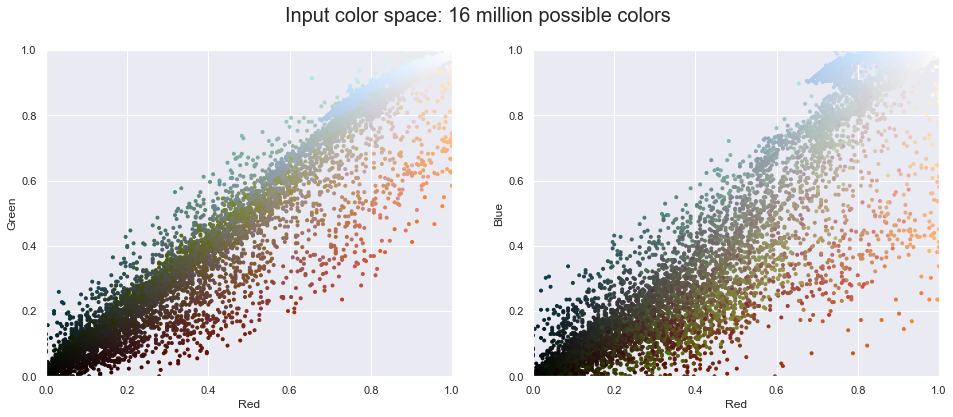

In [18]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [19]:
255 * 255 * 255

16581375

__Step 5:__ Reducing the number of colours down to 16 using `KMeans` and plotting the results

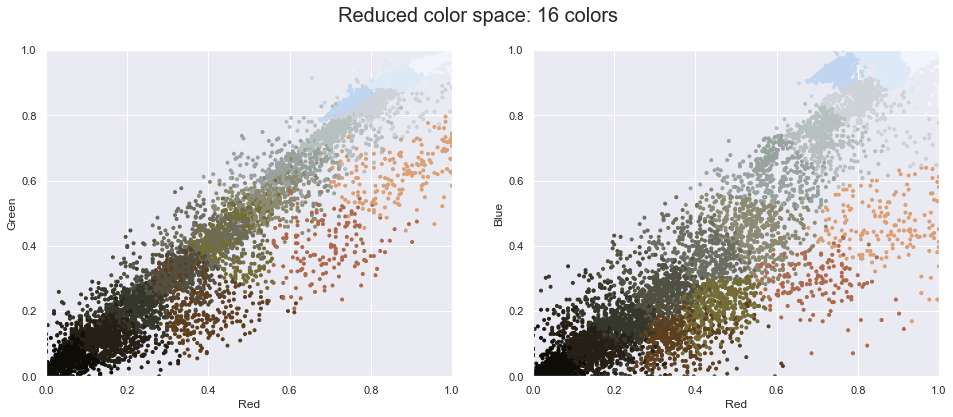

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

#Plotting the results
plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

__Step 6:__ Compare results before and after compression

Plotting these new colors in the image space rather than the pixel space shows us the effect of this:

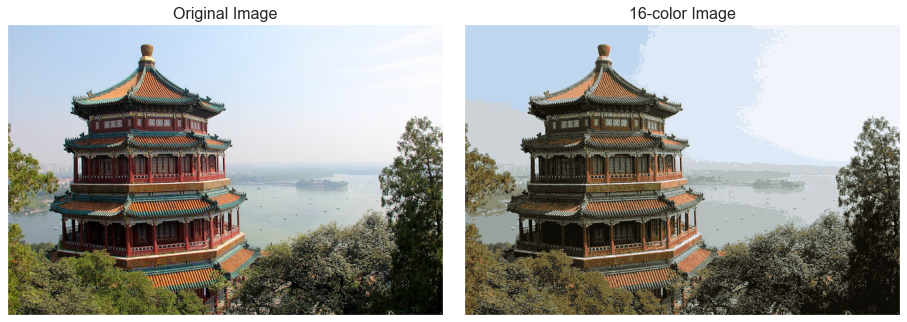

In [21]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

---------------------------------------
# Group Exercise
We will practice appling KMeans clustering to another use-case and dataset.

Let's use the `2016-2019-voter-data.csv` and try to cluster the different municipalities based on any features available in or derived from the dataset. We want to identify distinct groups of municipalities so we can design a better program for voter education in the country.

#### The solution
We can use KMeans clustering to group similar municipalities. The optimal number of groups will be determined by trying different values and measuring the quality of the groups based on the silhouette score.

#### The process
__Step 1__: Import the dataset _(done for you)_

In [2]:
import pandas as pd

df = pd.read_csv('data/2016-2019-voter-data.csv', index_col=0)


In [4]:
df.head()

,Province,Municipality,2016-Registered_Voters,2016-Registered_Male,2016-Registered_Female,2016-Registered_17-19,2016-Registered_20-24,2016-Registered_25-29,2016-Registered_30-34,2016-Registered_35-39,...,2019-Clustered_Precincts,2019-Registered_Voters,2019-Registered_Male,2019-Registered_Female,2019-Actual_Voters,2019-Actual_Voters_Male,2019-Actual_Voters_Female,2019-Total_Voters_Turnout,2019-Male_Voters_Turnout,2019-Female_Voters_Turnout
Region,,,,,,,,,,,,,,,,,,,,,
ARMM,BASILAN,AKBAR,5349.0,2560.0,2789.0,137.0,1411.0,674.0,613.0,520.0,...,11,6183,2943,3240,4303,1942,2361,69.59,65.99,72.87
ARMM,BASILAN,AL-BARKA,7332.0,3371.0,3961.0,46.0,1903.0,1029.0,936.0,725.0,...,16,9074,4284,4790,6782,3110,3672,74.74,72.60,76.66
ARMM,BASILAN,HADJI MOHAMMAD AJUL,8594.0,4299.0,4295.0,1232.0,1716.0,1162.0,908.0,767.0,...,16,11193,5664,5529,6906,3535,3371,61.70,62.41,60.97
ARMM,BASILAN,HADJI MUHTAMAD,8135.0,4326.0,3809.0,211.0,1809.0,1227.0,1095.0,880.0,...,15,9373,4968,4405,6428,3401,3027,68.58,68.46,68.72
ARMM,BASILAN,LAMITAN CITY,45827.0,22505.0,23322.0,5623.0,7227.0,5375.0,4767.0,4122.0,...,73,51623,25447,26176,37589,18835,18754,72.81,74.02,71.65


In [3]:
df.columns

Index(['Province', 'Municipality', '2016-Registered_Voters',
       '2016-Registered_Male', '2016-Registered_Female',
       '2016-Registered_17-19', '2016-Registered_20-24',
       '2016-Registered_25-29', '2016-Registered_30-34',
       '2016-Registered_35-39', '2016-Registered_40-44',
       '2016-Registered_45-49', '2016-Registered_50-54',
       '2016-Registered_55-59', '2016-Registered_60-64',
       '2016-Registered_65-Above', '2016-Registered_Literacy',
       '2016-Registered_Indigenous_People', '2016-Registered_PWD',
       '2016-Registered_Single', '2016-Registered_Married',
       '2016-Registered_Widow_ER', '2016-Registered_Legally_Separated',
       'Location', '2019-Established_Precincts', '2019-Clustered_Precincts',
       '2019-Registered_Voters', '2019-Registered_Male',
       '2019-Registered_Female', '2019-Actual_Voters',
       '2019-Actual_Voters_Male', '2019-Actual_Voters_Female',
       '2019-Total_Voters_Turnout', '2019-Male_Voters_Turnout',
       '2019-Female

__Step 2__: Select the columns you want to use for clustering and do feature scaling using `Normalizer` from `sklearn.preprocessing`.

In [15]:
from sklearn.preprocessing import Normalizer

# Select features for clustering
feature_cols = ['2019-Total_Voters_Turnout',
                '2016-Registered_20-24','2016-Registered_25-29',
                '2016-Registered_Single', '2016-Registered_Married',
               '2019-Actual_Voters_Male', '2019-Actual_Voters_Female']
              
X = df[feature_cols]

# Feature scaling
X=Normalizer().fit_transform(X.values)

__Step 3:__ Train initial KMeans model with `n_clusters` = 5, and print out the `inertia` and `silhouette_score`

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [17]:
print("Inertia: " + str(kmeans.inertia_))

Inertia: 0.0


In [18]:
from sklearn.metrics import silhouette_score

s_score = silhouette_score(X, y_kmeans)
print("Silhouette: " + str(s_score))

ValueError: Number of labels is 4. Valid values are 2 to n_samples - 1 (inclusive)

__Step 4:__ Tune the model by trying different values for `n_clusters` between 3-20 and plot the results to determine the best parameter.

In [8]:
inertia = []
sil = []

# changing the number of clusters 
for k in range(3,15):
    
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    y_pred = km.predict(X)
    
    inertia.append((k, km.inertia_))
    sil.append((k, silhouette_score(X, y_pred)))

Text(0.5, 1.0, 'Silhouetter Score Curve')

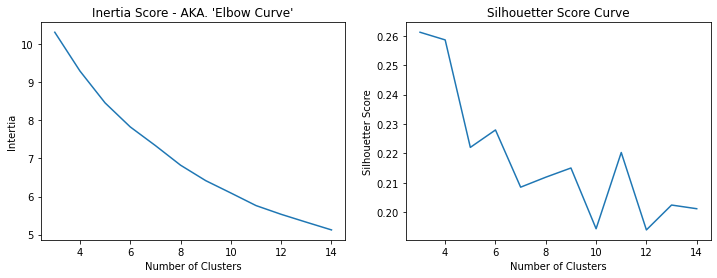

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title("Inertia Score - AKA. 'Elbow Curve'")

# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

__Step 5:__ Apply the optimal number of clusters and append cluster labels to your original df.

In [10]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.predict(X)

In [11]:
#set cluster Labels as index
df['Cluster Labels'] = labels
#dropped Province Municipality
df = df.drop(columns = ['Province', 'Municipality'])
df = df.set_index('Cluster Labels')
df.head()

,2016-Registered_Voters,2016-Registered_Male,2016-Registered_Female,2016-Registered_17-19,2016-Registered_20-24,2016-Registered_25-29,2016-Registered_30-34,2016-Registered_35-39,2016-Registered_40-44,2016-Registered_45-49,...,2019-Clustered_Precincts,2019-Registered_Voters,2019-Registered_Male,2019-Registered_Female,2019-Actual_Voters,2019-Actual_Voters_Male,2019-Actual_Voters_Female,2019-Total_Voters_Turnout,2019-Male_Voters_Turnout,2019-Female_Voters_Turnout
Cluster Labels,,,,,,,,,,,,,,,,,,,,,
0,5349.0,2560.0,2789.0,137.0,1411.0,674.0,613.0,520.0,473.0,423.0,...,11,6183,2943,3240,4303,1942,2361,69.59,65.99,72.87
0,7332.0,3371.0,3961.0,46.0,1903.0,1029.0,936.0,725.0,758.0,581.0,...,16,9074,4284,4790,6782,3110,3672,74.74,72.60,76.66
0,8594.0,4299.0,4295.0,1232.0,1716.0,1162.0,908.0,767.0,824.0,645.0,...,16,11193,5664,5529,6906,3535,3371,61.70,62.41,60.97
0,8135.0,4326.0,3809.0,211.0,1809.0,1227.0,1095.0,880.0,790.0,565.0,...,15,9373,4968,4405,6428,3401,3027,68.58,68.46,68.72
0,45827.0,22505.0,23322.0,5623.0,7227.0,5375.0,4767.0,4122.0,4267.0,3945.0,...,73,51623,25447,26176,37589,18835,18754,72.81,74.02,71.65


In [12]:
#from day 8 notebook
df = df.groupby("Cluster Labels").mean().reset_index()
df.head()

,Cluster Labels,2016-Registered_Voters,2016-Registered_Male,2016-Registered_Female,2016-Registered_17-19,2016-Registered_20-24,2016-Registered_25-29,2016-Registered_30-34,2016-Registered_35-39,2016-Registered_40-44,...,2019-Clustered_Precincts,2019-Registered_Voters,2019-Registered_Male,2019-Registered_Female,2019-Actual_Voters,2019-Actual_Voters_Male,2019-Actual_Voters_Female,2019-Total_Voters_Turnout,2019-Male_Voters_Turnout,2019-Female_Voters_Turnout
0,0,20379.118694,10241.412463,10137.706231,1117.744807,3201.305638,2800.958457,2343.884273,2111.204748,1935.329377,...,35.569733,23512.848665,11837.896142,11674.952522,18104.293769,9117.356083,8986.937685,77.355223,77.355282,77.355341
1,1,28211.693503,13798.254237,14413.439266,1096.950565,4107.519774,3888.329096,3240.546610,3000.446328,2635.833333,...,46.108757,32213.141243,15804.868644,16408.272599,25191.302260,12309.783898,12881.518362,79.654972,79.278263,80.033489
2,2,58883.994429,27717.350975,31166.643454,3277.855153,8509.465181,8068.994429,7098.105850,6442.933148,5582.144847,...,85.300836,66696.323120,31520.704735,35175.618384,48632.637883,22862.222841,25770.415042,77.457242,76.742786,78.173259
3,3,27751.513043,13655.030435,14096.482609,3101.478261,4092.630435,3375.686957,3047.747826,2678.408696,2514.021739,...,46.130435,31476.900000,15509.952174,15966.947826,24298.791304,11895.526087,12403.265217,79.050826,78.591913,79.511304


In [13]:
#start of VIZ 
#changed df variables below to match df
from math import pi
def make_spider( row, title, color):
 
    # number of variable
    categories=list(df)[1:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 3.5)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
#     plt.yticks([-2, -1, 0, 1, 2], [-2,-1, 0, 1, 2], color="grey", size=7) #for sscaled
#     plt.ylim(-2.5,2.5)
    plt.yticks([-0.25, 0, 0.25, 0.5, 0.75, 1], [-0.25, 0, 0.25, 0.5,0.75, 1], color="grey", size=7) #formmscaled
    plt.ylim(-0.25,1)

    # Ind1
    values=df.loc[row].drop('Cluster Labels').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    plt.title(title, size=14, color=color, y=1.1)

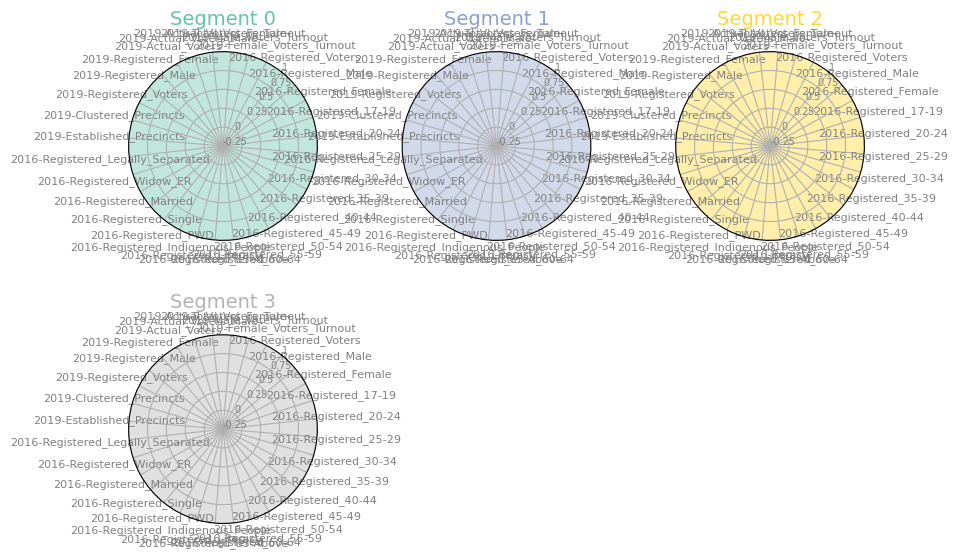

In [14]:
#viz plt save image
my_dpi=100
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
plt.subplots_adjust(hspace=0.5)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))

for row in range(0, len(df.index)):
    make_spider(row=row, 
                title='Segment '+(df['Cluster Labels'][row]).astype(str), 
                color=my_palette(row))
    
plt.savefig('clusters.png')

__Step 6:__ Inspect which municipalities were assigned to each group when we applied the optimal number of clusters.

In [29]:
df[df['Cluster Labels'] == 0]

,Province,Municipality,2016-Registered_Voters,2016-Registered_Male,2016-Registered_Female,2016-Registered_17-19,2016-Registered_20-24,2016-Registered_25-29,2016-Registered_30-34,2016-Registered_35-39,...,2019-Registered_Voters,2019-Registered_Male,2019-Registered_Female,2019-Actual_Voters,2019-Actual_Voters_Male,2019-Actual_Voters_Female,2019-Total_Voters_Turnout,2019-Male_Voters_Turnout,2019-Female_Voters_Turnout,Cluster Labels
Region,,,,,,,,,,,,,,,,,,,,,
ARMM,BASILAN,HADJI MOHAMMAD AJUL,8594.0,4299.0,4295.0,1232.0,1716.0,1162.0,908.0,767.0,...,11193,5664,5529,6906,3535,3371,61.70,62.41,60.97,0
ARMM,BASILAN,LAMITAN CITY,45827.0,22505.0,23322.0,5623.0,7227.0,5375.0,4767.0,4122.0,...,51623,25447,26176,37589,18835,18754,72.81,74.02,71.65,0
ARMM,BASILAN,LANTAWAN,12011.0,6129.0,5882.0,1792.0,2237.0,1512.0,1261.0,997.0,...,13075,6740,6335,9921,5075,4846,75.88,75.30,76.50,0
ARMM,BASILAN,MALUSO,23436.0,11514.0,11922.0,3752.0,4421.0,3202.0,2678.0,2124.0,...,25765,12706,13059,16423,8087,8336,63.74,63.65,63.83,0
ARMM,BASILAN,TABUAN-LASA,12107.0,6465.0,5642.0,4127.0,2075.0,1295.0,1090.0,871.0,...,13707,7346,6361,10881,5903,4978,79.38,80.36,78.26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
REGION XI,DAVAO ORIENTAL,LUPON,42756.0,22090.0,20666.0,5307.0,6683.0,5534.0,4518.0,4013.0,...,47589,24580,23009,37613,19290,18323,79.04,78.48,79.63,0
REGION XI,DAVAO ORIENTAL,MANAY,23037.0,12054.0,10983.0,2297.0,3426.0,2837.0,2483.0,2185.0,...,26820,14147,12673,19970,10407,9563,74.46,73.56,75.46,0
REGION XI,DAVAO ORIENTAL,MATI CITY,73912.0,37043.0,36869.0,8731.0,10913.0,8938.0,7763.0,7579.0,...,85289,42902,42387,69768,35095,34673,81.80,81.80,81.80,0


In [18]:
df.describe()

,2016-Registered_Voters,2016-Registered_Male,2016-Registered_Female,2016-Registered_17-19,2016-Registered_20-24,2016-Registered_25-29,2016-Registered_30-34,2016-Registered_35-39,2016-Registered_40-44,2016-Registered_45-49,...,2019-Clustered_Precincts,2019-Registered_Voters,2019-Registered_Male,2019-Registered_Female,2019-Actual_Voters,2019-Actual_Voters_Male,2019-Actual_Voters_Female,2019-Total_Voters_Turnout,2019-Male_Voters_Turnout,2019-Female_Voters_Turnout
count,1.634000e+03,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,...,1634.000000,1.634000e+03,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000
mean,3.327041e+04,16102.635251,17167.771114,1862.552632,4885.659119,4510.426561,3876.008568,3528.053244,3121.536720,2864.564259,...,52.548960,3.789131e+04,18398.066095,19493.244186,28754.239902,13911.496328,14842.743574,78.612772,78.227993,78.998935
std,6.223663e+04,28473.219383,33796.882518,3995.397691,8597.019895,8460.718463,7634.481653,6914.701218,6065.143659,5504.722110,...,82.660353,7.050548e+04,32408.503405,38134.227764,48844.130851,22360.226825,26512.477224,6.400664,6.870332,6.391642
min,3.350000e+02,257.000000,78.000000,1.000000,37.000000,61.000000,50.000000,46.000000,42.000000,26.000000,...,1.000000,3.910000e+02,288.000000,103.000000,236.000000,179.000000,57.000000,42.010000,34.140000,48.050000
25%,1.215250e+04,6072.000000,5995.250000,567.000000,1933.750000,1612.000000,1324.250000,1194.250000,1075.000000,1005.750000,...,23.000000,1.395475e+04,7005.500000,6884.750000,11068.000000,5531.500000,5517.750000,76.035000,75.350000,76.380000
50%,2.000600e+04,9932.000000,9981.500000,979.500000,3051.500000,2680.000000,2221.000000,2005.500000,1802.000000,1664.000000,...,35.000000,2.256250e+04,11289.000000,11193.000000,17698.500000,8860.000000,8826.500000,79.330000,78.995000,79.630000
75%,3.298550e+04,16389.500000,16648.000000,1910.250000,4921.000000,4561.000000,3759.500000,3405.500000,3085.750000,2882.500000,...,55.000000,3.780525e+04,18737.750000,18964.000000,29968.500000,14625.000000,15080.750000,81.957500,81.900000,82.230000
max,1.150342e+06,509698.000000,640644.000000,72317.000000,155196.000000,148303.000000,136709.000000,126212.000000,113914.000000,104994.000000,...,1502.000000,1.330118e+06,593343.000000,736775.000000,907912.000000,405478.000000,502434.000000,178.370000,178.700000,177.990000


In [ ]:
df[df['Cluster Labels'] == 0]

In [21]:
df[df['Cluster Labels'] == 1]

KeyError: 'Cluster Labels'

In [16]:
df[df['Cluster Labels'] == 2]

,Province,Municipality,2016-Registered_Voters,2016-Registered_Male,2016-Registered_Female,2016-Registered_17-19,2016-Registered_20-24,2016-Registered_25-29,2016-Registered_30-34,2016-Registered_35-39,...,2019-Registered_Voters,2019-Registered_Male,2019-Registered_Female,2019-Actual_Voters,2019-Actual_Voters_Male,2019-Actual_Voters_Female,2019-Total_Voters_Turnout,2019-Male_Voters_Turnout,2019-Female_Voters_Turnout,Cluster Labels
Region,,,,,,,,,,,,,,,,,,,,,
ARMM,LANAO DEL SUR,MALABANG,14618.0,6903.0,7715.0,434.0,3005.0,1899.0,1478.0,1517.0,...,20269,9702,10567,15661,7802,7859,77.27,80.42,74.37,2
ARMM,MAGUINDANAO,PANDAG,6985.0,3613.0,3372.0,127.0,1454.0,1139.0,904.0,771.0,...,12330,6359,5971,12016,6185,5831,97.45,97.26,97.66,2
ARMM,MAGUINDANAO,SHARIFF AGUAK (MAGANOY),12635.0,6559.0,6076.0,328.0,2436.0,2006.0,1628.0,1378.0,...,16248,8477,7771,10519,5475,5044,64.74,64.59,64.91,2
ARMM,MAGUINDANAO,SOUTH UPI,20802.0,11711.0,9091.0,1102.0,3759.0,3256.0,2698.0,2180.0,...,25971,14487,11484,16160,8643,7517,62.22,59.66,65.46,2
ARMM,MAGUINDANAO,SULTAN SA BARONGIS (LAMBAYONG),10267.0,5542.0,4725.0,227.0,2006.0,1515.0,1273.0,1143.0,...,13994,7572,6422,8561,4790,3771,61.18,63.26,58.72,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
REGION XII,SOUTH COTABATO,TUPI,38543.0,19186.0,19357.0,1275.0,6010.0,6169.0,5015.0,4167.0,...,45216,22594,22622,34369,17344,17025,76.01,76.76,75.26,2
REGION XII,SULTAN KUDARAT,BAGUMBAYAN,37884.0,20279.0,17605.0,1263.0,6160.0,5929.0,4805.0,4143.0,...,43867,23487,20380,30700,16233,14467,69.98,69.11,70.99,2
REGION XII,SULTAN KUDARAT,KALAMANSIG,22984.0,13292.0,9692.0,890.0,3492.0,3246.0,2863.0,2693.0,...,26729,15044,11685,18119,9609,8510,67.79,63.87,72.83,2


In [17]:
df[df['Cluster Labels'] == 3]

,Province,Municipality,2016-Registered_Voters,2016-Registered_Male,2016-Registered_Female,2016-Registered_17-19,2016-Registered_20-24,2016-Registered_25-29,2016-Registered_30-34,2016-Registered_35-39,...,2019-Registered_Voters,2019-Registered_Male,2019-Registered_Female,2019-Actual_Voters,2019-Actual_Voters_Male,2019-Actual_Voters_Female,2019-Total_Voters_Turnout,2019-Male_Voters_Turnout,2019-Female_Voters_Turnout,Cluster Labels
Region,,,,,,,,,,,,,,,,,,,,,
CAR,ABRA,BOLINEY,2790.0,1449.0,1341.0,298.0,420.0,336.0,326.0,253.0,...,2965,1536,1429,2725,1435,1290,91.91,93.42,90.27,3
CAR,ABRA,DAGUIOMAN,1291.0,709.0,582.0,119.0,173.0,157.0,125.0,118.0,...,1391,761,630,1223,676,547,87.92,88.83,86.83,3
CAR,ABRA,LACUB,2700.0,1492.0,1208.0,378.0,432.0,385.0,286.0,226.0,...,2956,1631,1325,2338,1258,1080,79.09,77.13,81.51,3
CAR,ABRA,LAGAYAN,2816.0,1404.0,1412.0,314.0,398.0,323.0,278.0,251.0,...,3144,1572,1572,2516,1284,1232,80.03,81.68,78.37,3
CAR,ABRA,LANGIDEN,2736.0,1389.0,1347.0,352.0,441.0,350.0,289.0,223.0,...,2922,1472,1450,2393,1229,1164,81.90,83.49,80.28,3
CAR,ABRA,PEÑARRUBIA,4655.0,2255.0,2400.0,577.0,718.0,589.0,492.0,412.0,...,5063,2468,2595,4218,2119,2099,83.31,85.86,80.89,3
CAR,BENGUET,ATOK,10427.0,5527.0,4900.0,363.0,1544.0,1600.0,1302.0,1092.0,...,11364,5979,5385,9154,4907,4247,80.55,82.07,78.87,3
CAR,BENGUET,BAKUN,9074.0,5003.0,4071.0,335.0,1485.0,1473.0,1055.0,932.0,...,9856,5391,4465,8042,4435,3607,81.59,82.27,80.78,3
CAR,KALINGA,BALBALAN,8809.0,4832.0,3977.0,285.0,1244.0,1221.0,956.0,844.0,...,9151,4991,4160,7693,4247,3446,84.07,85.09,82.84,3


In [18]:
df[df['Cluster Labels'] == 4]

,Province,Municipality,2016-Registered_Voters,2016-Registered_Male,2016-Registered_Female,2016-Registered_17-19,2016-Registered_20-24,2016-Registered_25-29,2016-Registered_30-34,2016-Registered_35-39,...,2019-Registered_Voters,2019-Registered_Male,2019-Registered_Female,2019-Actual_Voters,2019-Actual_Voters_Male,2019-Actual_Voters_Female,2019-Total_Voters_Turnout,2019-Male_Voters_Turnout,2019-Female_Voters_Turnout,Cluster Labels
Region,,,,,,,,,,,,,,,,,,,,,
ARMM,BASILAN,HADJI MOHAMMAD AJUL,8594.0,4299.0,4295.0,1232.0,1716.0,1162.0,908.0,767.0,...,11193,5664,5529,6906,3535,3371,61.70,62.41,60.97,4
ARMM,BASILAN,LANTAWAN,12011.0,6129.0,5882.0,1792.0,2237.0,1512.0,1261.0,997.0,...,13075,6740,6335,9921,5075,4846,75.88,75.30,76.50,4
ARMM,BASILAN,MALUSO,23436.0,11514.0,11922.0,3752.0,4421.0,3202.0,2678.0,2124.0,...,25765,12706,13059,16423,8087,8336,63.74,63.65,63.83,4
ARMM,BASILAN,TABUAN-LASA,12107.0,6465.0,5642.0,4127.0,2075.0,1295.0,1090.0,871.0,...,13707,7346,6361,10881,5903,4978,79.38,80.36,78.26,4
ARMM,LANAO DEL SUR,BALABAGAN,14335.0,7076.0,7259.0,2475.0,2718.0,1627.0,1519.0,1374.0,...,15816,7882,7934,11169,5566,5603,70.62,70.62,70.62,4
ARMM,LANAO DEL SUR,BUTIG,11237.0,5620.0,5617.0,2136.0,2683.0,1607.0,1073.0,995.0,...,12135,5992,6143,8833,4133,4700,72.79,68.98,76.51,4
ARMM,LANAO DEL SUR,CALANOGAS,5621.0,2342.0,3279.0,621.0,1309.0,749.0,631.0,634.0,...,6386,2740,3646,4535,1919,2616,71.01,70.04,71.75,4
ARMM,LANAO DEL SUR,KAPATAGAN,9098.0,4415.0,4683.0,1518.0,2061.0,1081.0,935.0,865.0,...,10646,5173,5473,9771,4977,4794,91.78,96.21,87.59,4
ARMM,LANAO DEL SUR,LUMBA-BAYABAO (MAGUING),13157.0,6065.0,7092.0,2616.0,3002.0,1503.0,1178.0,1064.0,...,14852,7025,7827,11095,5186,5909,74.70,73.82,75.50,4


In [19]:
df[df['Cluster Labels'] == 5]

,Province,Municipality,2016-Registered_Voters,2016-Registered_Male,2016-Registered_Female,2016-Registered_17-19,2016-Registered_20-24,2016-Registered_25-29,2016-Registered_30-34,2016-Registered_35-39,...,2019-Registered_Voters,2019-Registered_Male,2019-Registered_Female,2019-Actual_Voters,2019-Actual_Voters_Male,2019-Actual_Voters_Female,2019-Total_Voters_Turnout,2019-Male_Voters_Turnout,2019-Female_Voters_Turnout,Cluster Labels
Region,,,,,,,,,,,,,,,,,,,,,
ARMM,BASILAN,AKBAR,5349.0,2560.0,2789.0,137.0,1411.0,674.0,613.0,520.0,...,6183,2943,3240,4303,1942,2361,69.59,65.99,72.87,5
ARMM,BASILAN,AL-BARKA,7332.0,3371.0,3961.0,46.0,1903.0,1029.0,936.0,725.0,...,9074,4284,4790,6782,3110,3672,74.74,72.60,76.66,5
ARMM,BASILAN,HADJI MUHTAMAD,8135.0,4326.0,3809.0,211.0,1809.0,1227.0,1095.0,880.0,...,9373,4968,4405,6428,3401,3027,68.58,68.46,68.72,5
ARMM,BASILAN,SUMISIP,20849.0,9983.0,10866.0,615.0,4421.0,2924.0,2743.0,2261.0,...,23610,11483,12127,13696,6459,7237,58.01,56.25,59.68,5
ARMM,BASILAN,TIPO-TIPO,9658.0,4476.0,5182.0,480.0,2206.0,1255.0,1214.0,960.0,...,12135,5761,6374,8411,3964,4447,69.31,68.81,69.77,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ARMM,SULU,TAPUL,7905.0,3894.0,4011.0,183.0,1835.0,1168.0,984.0,789.0,...,7562,3685,3877,4287,2021,2266,56.69,54.84,58.45,5
ARMM,SULU,TONGKIL,11293.0,5763.0,5530.0,382.0,2564.0,1559.0,1524.0,1219.0,...,12573,6486,6087,10333,5298,5035,82.18,81.68,82.72,5
ARMM,TAWI-TAWI,LANGUYAN,15541.0,9256.0,6285.0,905.0,3738.0,2516.0,1977.0,1583.0,...,17770,11005,6765,17181,10577,6604,96.69,96.11,97.62,5


In [20]:
df[df['Cluster Labels'] == 6]

,Province,Municipality,2016-Registered_Voters,2016-Registered_Male,2016-Registered_Female,2016-Registered_17-19,2016-Registered_20-24,2016-Registered_25-29,2016-Registered_30-34,2016-Registered_35-39,...,2019-Registered_Voters,2019-Registered_Male,2019-Registered_Female,2019-Actual_Voters,2019-Actual_Voters_Male,2019-Actual_Voters_Female,2019-Total_Voters_Turnout,2019-Male_Voters_Turnout,2019-Female_Voters_Turnout,Cluster Labels
Region,,,,,,,,,,,,,,,,,,,,,
